In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from thesis_tools.utils.data import *

In [3]:
data = read_billionaires_data(only_years=['2022'])

In [4]:
# Encode the sub_region as an integer index
data['sub_region_code'] = data['sub_region'].astype('category').cat.codes
num_regions = data['sub_region_code'].nunique()

In [5]:
data

,year,rank,net_worth,full_name,self_made,country_of_citizenship,region,sub_region,log_net_worth,sub_region_code
0,2022-01-01,1,219.0,Elon Musk,True,United States,North America,U.S.,5.389072,18
1,2022-01-01,2,171.0,Jeff Bezos,True,United States,North America,U.S.,5.141664,18
2,2022-01-01,3,158.0,Bernard Arnault & family,False,France,Europe,France,5.062595,7
3,2022-01-01,4,129.0,Bill Gates,True,United States,North America,U.S.,4.859812,18
4,2022-01-01,5,118.0,Warren Buffett,True,United States,North America,U.S.,4.770685,18
...,...,...,...,...,...,...,...,...,...,...
2663,2022-01-01,2578,1.0,Zhang Yuqiang,True,China,China,China,0.000000,6
2664,2022-01-01,2578,1.0,Zhou Ruxin,True,China,China,China,0.000000,6
2665,2022-01-01,2578,1.0,Zhou Wen & family,True,China,China,China,0.000000,6
2666,2022-01-01,2578,1.0,Zhou Yifeng & family,True,China,China,China,0.000000,6


In [13]:
# Model specification
with pm.Model() as model:
    # Varying intercepts (scale parameters for each sub_region)
    alpha = pm.Gamma('alpha', alpha=1, beta=1, shape=num_regions)

    # Likelihood
    net_worth = pm.Pareto('net_worth', alpha=alpha[data['sub_region_code']], m=1, observed=data['net_worth'])

In [14]:
# Model fitting
with model:
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, nuts_sampler='nutpie')

                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0]         0.814  0.113   0.601    1.026      0.001    0.001   16816.0   
alpha[1]         1.151  0.116   0.940    1.370      0.001    0.001   16824.0   
alpha[2]         0.935  0.136   0.663    1.175      0.001    0.001   16996.0   
alpha[3]         1.173  0.148   0.890    1.448      0.001    0.001   16620.0   
alpha[4]         0.855  0.113   0.646    1.063      0.001    0.001   16339.0   
alpha[5]         0.946  0.115   0.745    1.179      0.001    0.001   16243.0   
alpha[6]         1.082  0.044   1.002    1.167      0.000    0.000   17487.0   
alpha[7]         0.637  0.092   0.464    0.810      0.001    0.001   16572.0   
alpha[8]         0.952  0.082   0.803    1.110      0.001    0.000   16976.0   
alpha[9]         1.056  0.082   0.904    1.214      0.001    0.000   17689.0   
alpha[10]        1.277  0.175   0.970    1.622      0.001    0.001   18318.0   
alpha[11]        1.075  0.146   0.805   

array([[<Axes: title={'center': 'alpha\n0'}>,
        <Axes: title={'center': 'alpha\n1'}>,
        <Axes: title={'center': 'alpha\n2'}>,
        <Axes: title={'center': 'alpha\n3'}>],
       [<Axes: title={'center': 'alpha\n4'}>,
        <Axes: title={'center': 'alpha\n5'}>,
        <Axes: title={'center': 'alpha\n6'}>,
        <Axes: title={'center': 'alpha\n7'}>],
       [<Axes: title={'center': 'alpha\n8'}>,
        <Axes: title={'center': 'alpha\n9'}>,
        <Axes: title={'center': 'alpha\n10'}>,
        <Axes: title={'center': 'alpha\n11'}>],
       [<Axes: title={'center': 'alpha\n12'}>,
        <Axes: title={'center': 'alpha\n13'}>,
        <Axes: title={'center': 'alpha\n14'}>,
        <Axes: title={'center': 'alpha\n15'}>],
       [<Axes: title={'center': 'alpha\n16'}>,
        <Axes: title={'center': 'alpha\n17'}>,
        <Axes: title={'center': 'alpha\n18'}>,
        <Axes: title={'center': 'alpha_log__\n0'}>],
       [<Axes: title={'center': 'alpha_log__\n1'}>,
        

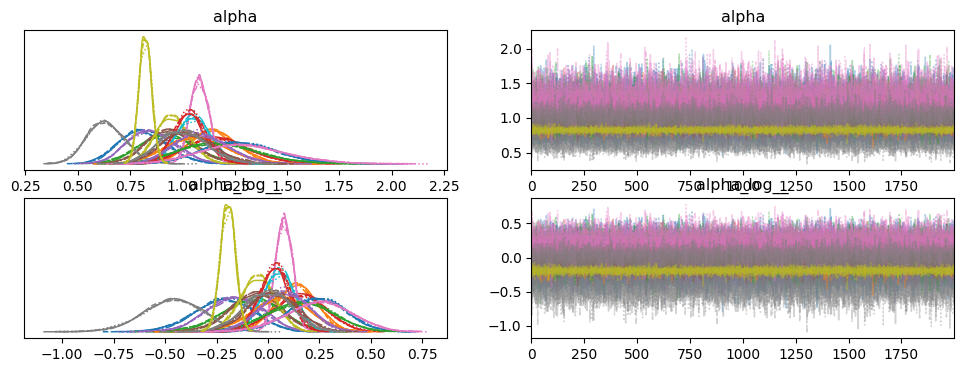

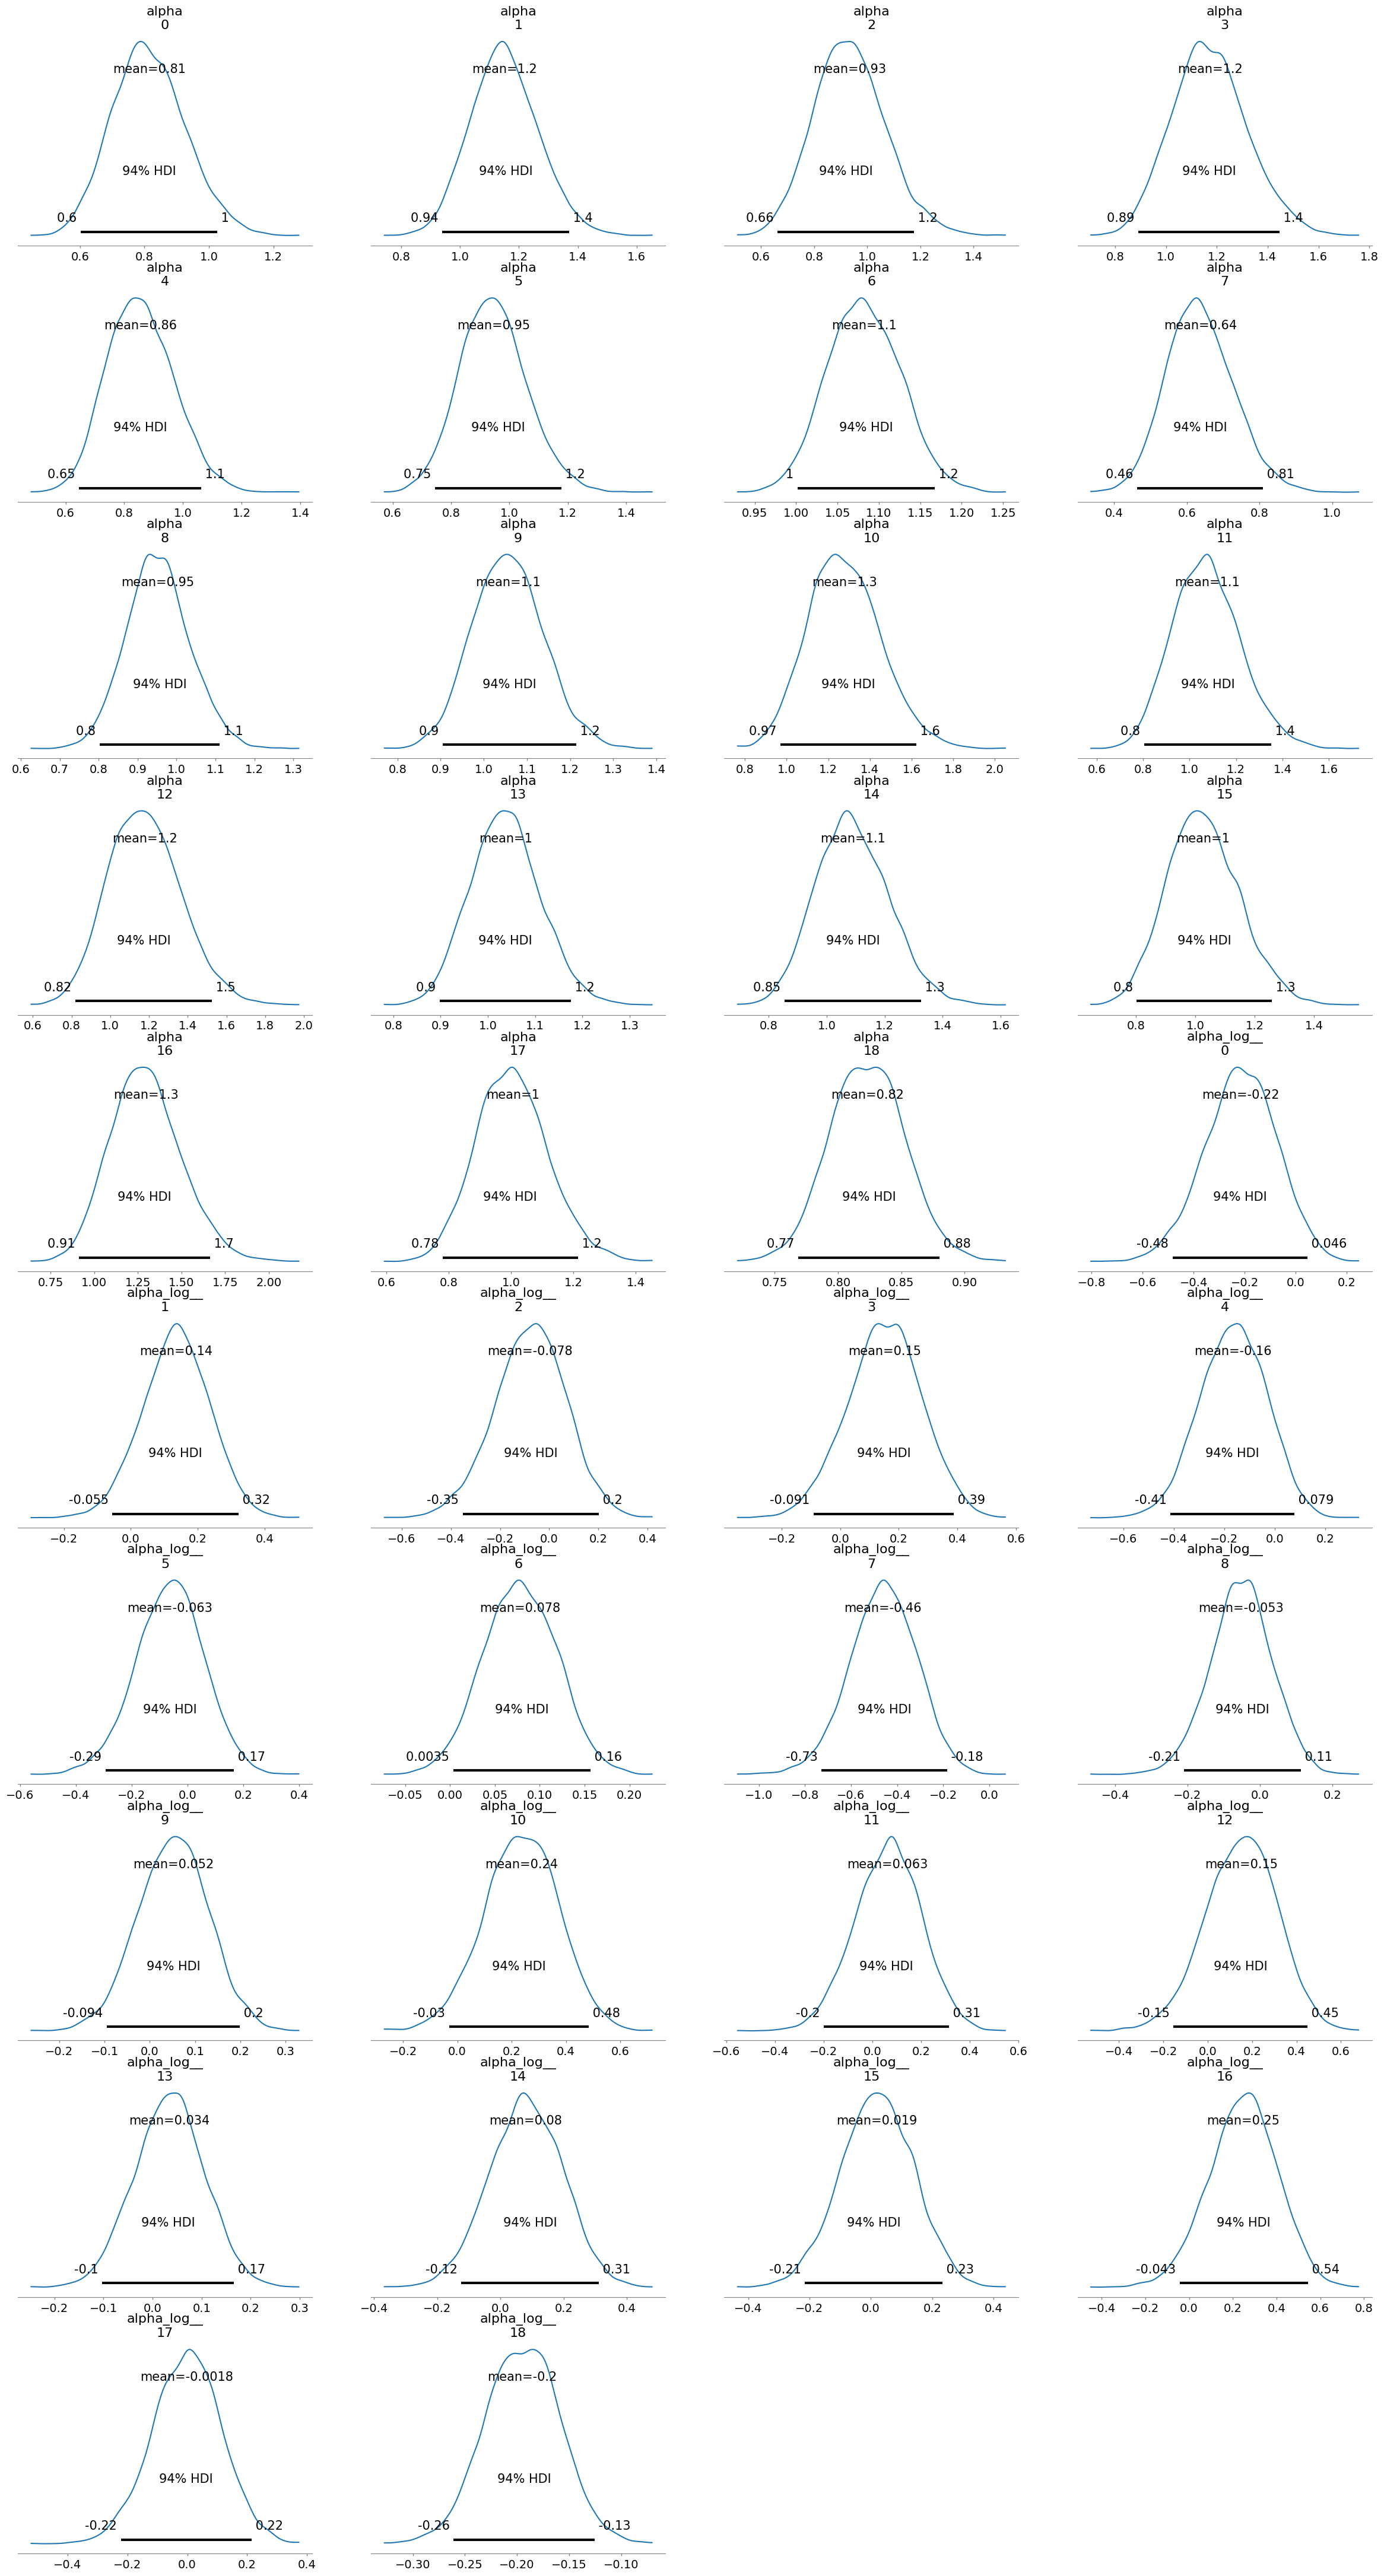

In [15]:
import arviz as az

# Summarize the trace
summary = az.summary(trace)
print(summary)

# Plot the posterior distributions
az.plot_trace(trace)
az.plot_posterior(trace)

In [16]:
# Posterior predictive sampling
with model:
    posterior_predictive = pm.sample_posterior_predictive(trace)

Sampling: [net_worth]


Output()

In [17]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

Warmup iterations saved (warmup_*).